In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/seattle-weather.csv')
print(data.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


<ipython-input-17-fcd18f95d06b>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = seasonal_decompose(data['precipitation'].fillna(method='ffill'), model='additive', period=30)  # Example period, adjust as needed
<ipython-input-17-fcd18f95d06b>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(data['precipitation'].fillna(method='ffill'), label='Original') # Replace 'precipitation' if needed


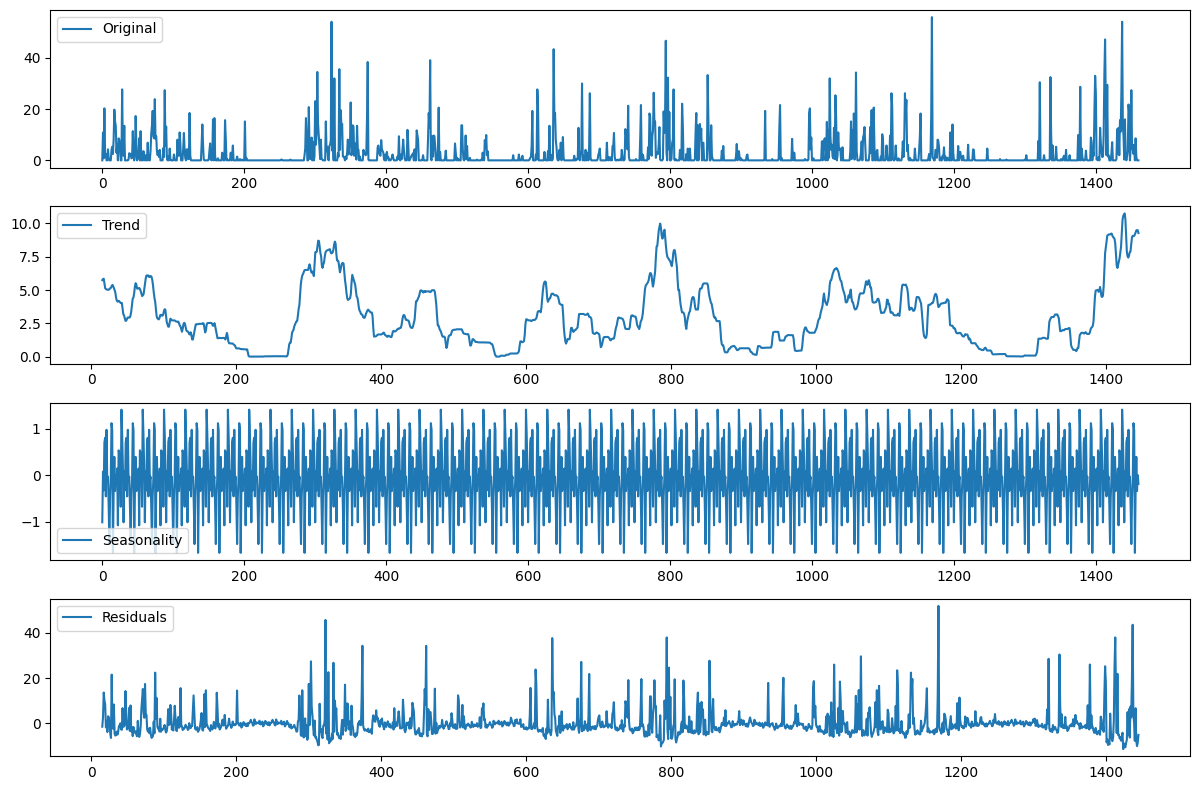

In [ ]:



result = seasonal_decompose(data['precipitation'].fillna(method='ffill'), model='additive', period=30)  # Example period, adjust as needed

# Access individual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plotting components (optional)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['precipitation'].fillna(method='ffill'), label='Original') # Replace 'precipitation' if needed
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



In [ ]:



# Fill missing values in numerical columns with the mean
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

# Fill missing values in categorical columns with the mode
categorical_cols = data.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Alternatively, fill missing values using forward fill (ffill) or backward fill (bfill)
# data.fillna(method='ffill', inplace=True)  # Forward fill
# data.fillna(method='bfill', inplace=True)  # Backward fill


print(data.isnull().sum()) # Check for remaining null values


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


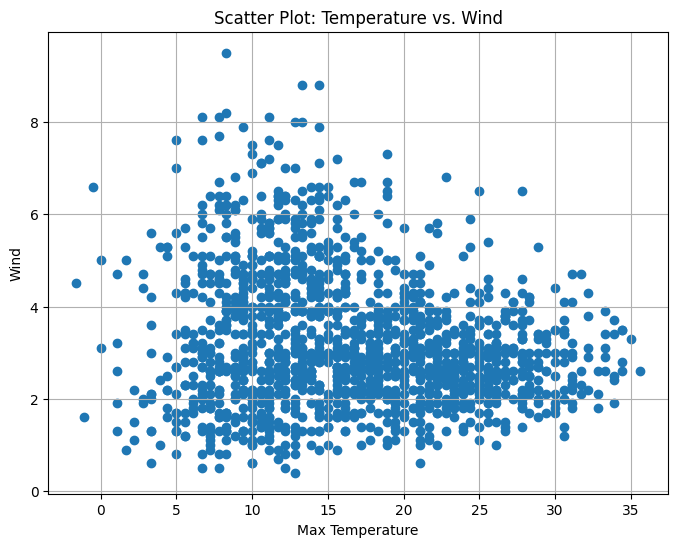

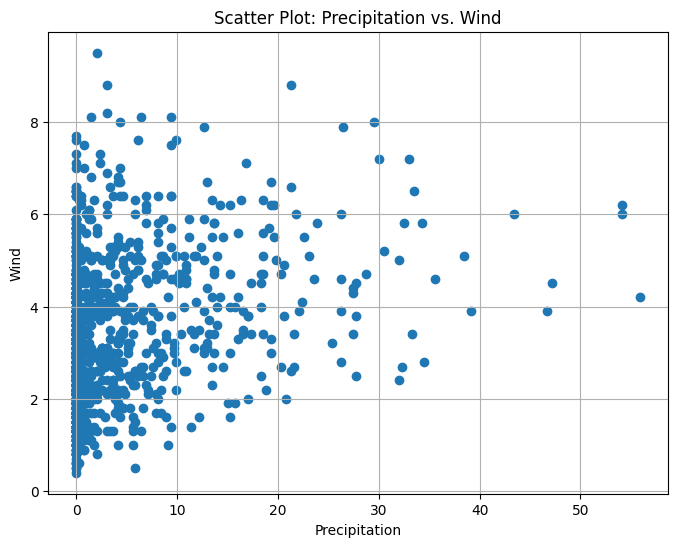

In [ ]:




# Example scatter plot: Temperature vs. Wind
plt.figure(figsize=(8, 6))
plt.scatter(data['temp_max'], data['wind'])
plt.xlabel('Max Temperature')
plt.ylabel('Wind')
plt.title('Scatter Plot: Temperature vs. Wind')
plt.grid(True)
plt.show()


# Example scatter plot: Precipitation vs. Wind
plt.figure(figsize=(8, 6))
plt.scatter(data['precipitation'], data['wind']) # Replace with actual column names if different
plt.xlabel('Precipitation')
plt.ylabel('Wind')
plt.title('Scatter Plot: Precipitation vs. Wind')
plt.grid(True)
plt.show()


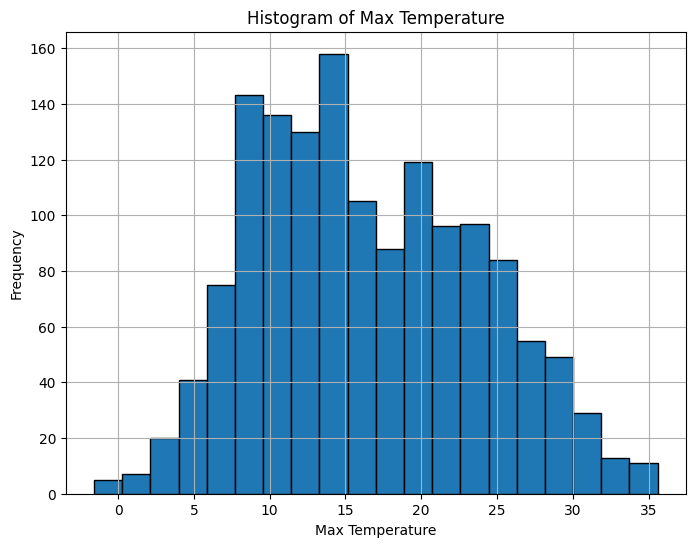

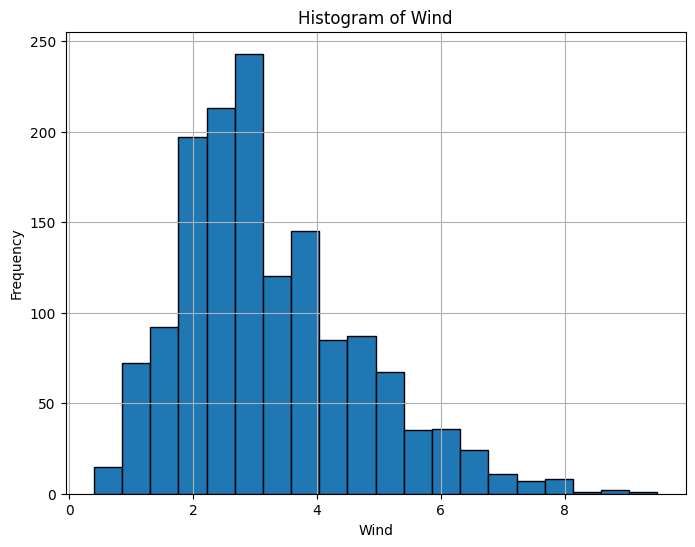

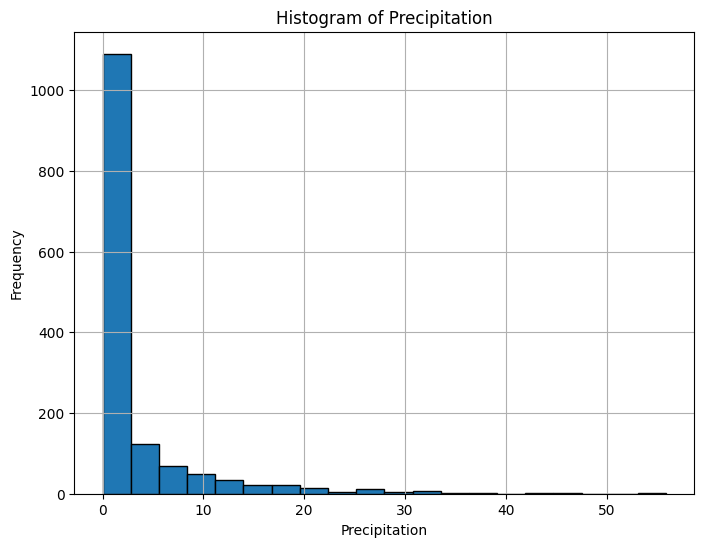

In [ ]:


import matplotlib.pyplot as plt



# Example histogram: Temperature
plt.figure(figsize=(8, 6))
plt.hist(data['temp_max'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Max Temperature')
plt.grid(True)
plt.show()

# Example histogram: Wind
plt.figure(figsize=(8, 6))
plt.hist(data['wind'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Wind')
plt.ylabel('Frequency')
plt.title('Histogram of Wind')
plt.grid(True)
plt.show()

# Example histogram: Precipitation
plt.figure(figsize=(8, 6))
plt.hist(data['precipitation'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation')
plt.grid(True)
plt.show()


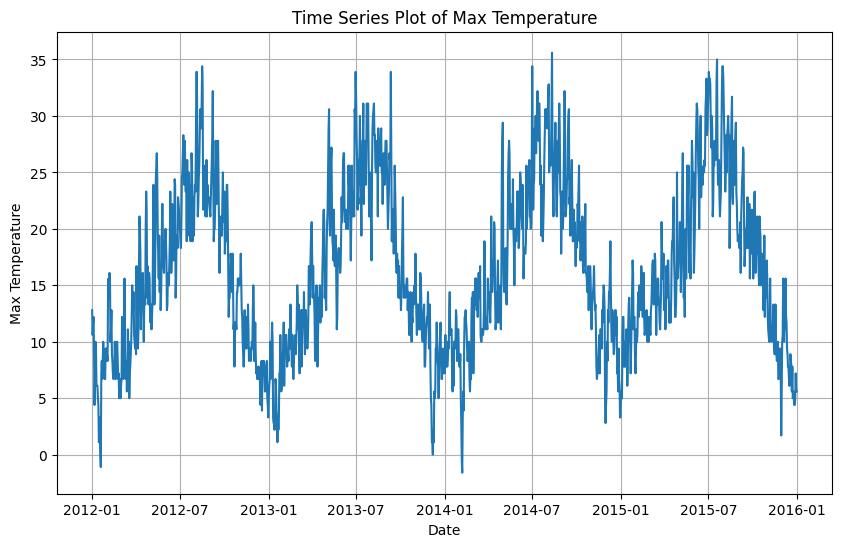

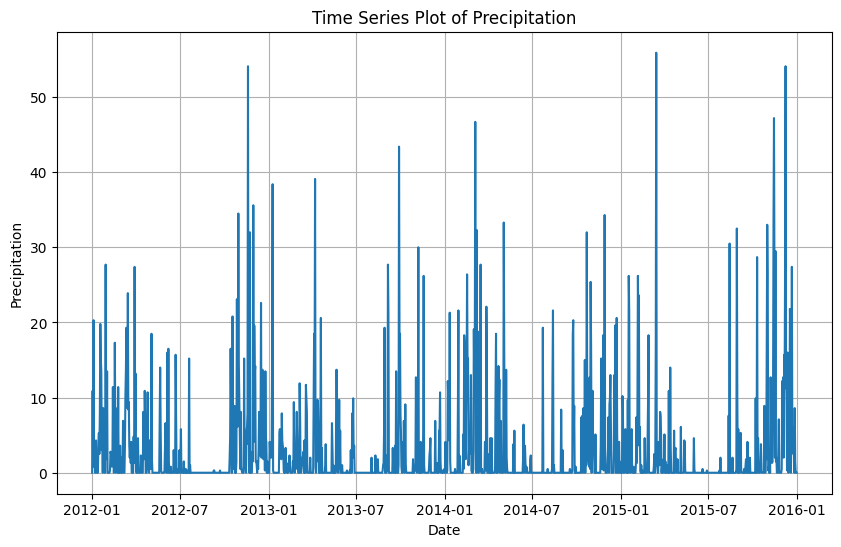

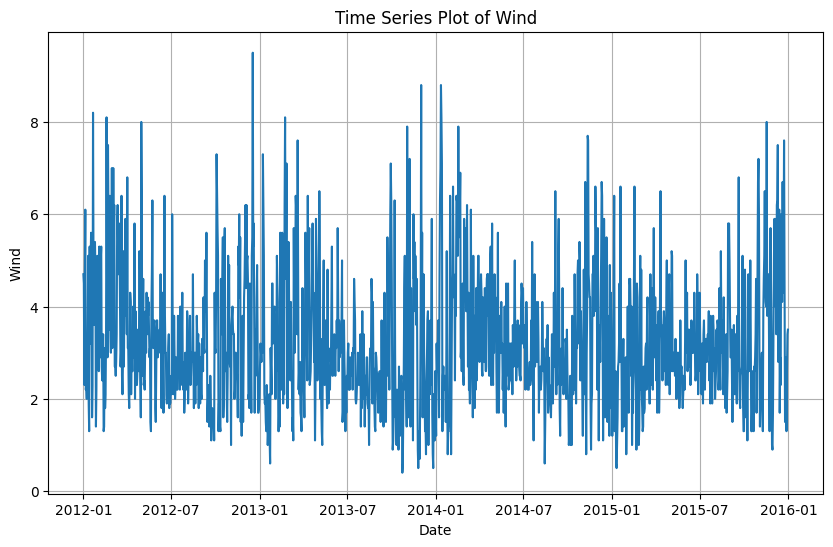

In [ ]:




# Convert 'date' column to datetime objects if it's not already
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index
data = data.set_index('date')


# Example time series plot: Temperature
plt.figure(figsize=(10, 6))
plt.plot(data['temp_max'])  # Replace 'temp_max' with the actual column name
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Time Series Plot of Max Temperature')
plt.grid(True)
plt.show()


# Example time series plot: Precipitation
plt.figure(figsize=(10, 6))
plt.plot(data['precipitation']) # Replace with actual column names if different
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Time Series Plot of Precipitation')
plt.grid(True)
plt.show()

# Example time series plot: Wind
plt.figure(figsize=(10, 6))
plt.plot(data['wind'])
plt.xlabel('Date')
plt.ylabel('Wind')
plt.title('Time Series Plot of Wind')
plt.grid(True)
plt.show()


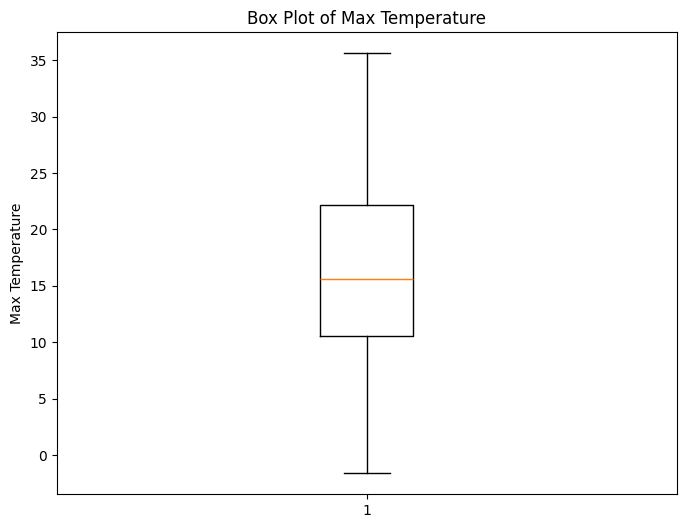

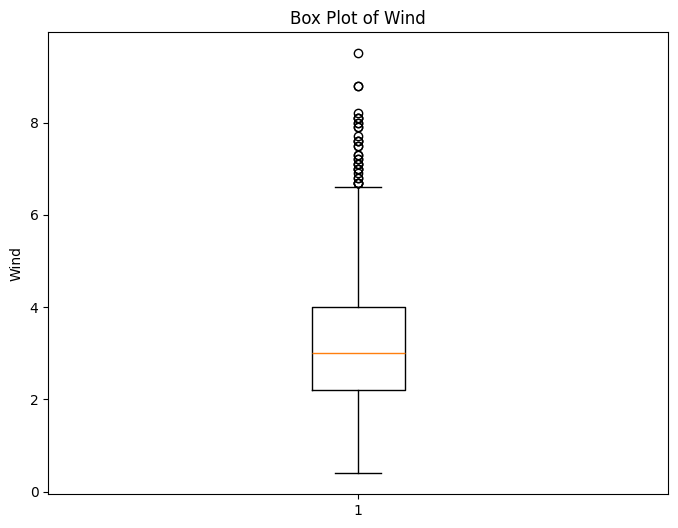

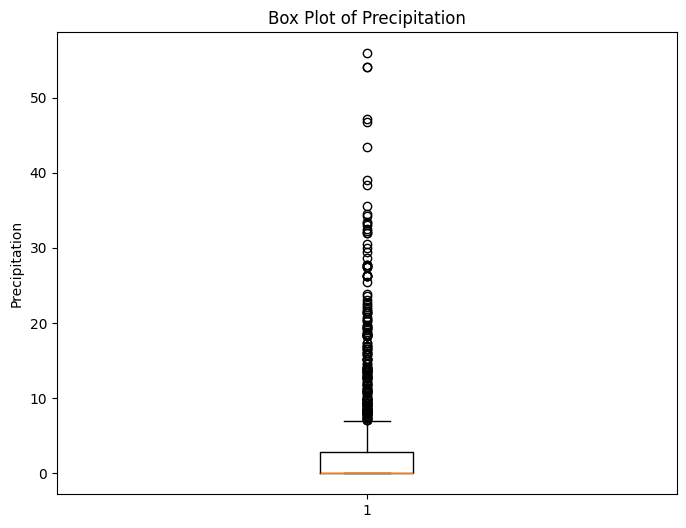

In [ ]:



# Example box plot: Max Temperature
plt.figure(figsize=(8, 6))
plt.boxplot(data['temp_max'])
plt.ylabel('Max Temperature')
plt.title('Box Plot of Max Temperature')
plt.show()

# Example box plot: Wind
plt.figure(figsize=(8, 6))
plt.boxplot(data['wind'])
plt.ylabel('Wind')
plt.title('Box Plot of Wind')
plt.show()

# Example box plot: Precipitation
plt.figure(figsize=(8, 6))
plt.boxplot(data['precipitation'])
plt.ylabel('Precipitation')
plt.title('Box Plot of Precipitation')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score
import numpy as np

# Load the data (make sure the file path is correct)
data = pd.read_csv('/content/seattle-weather.csv')  # This line loads the data

# Assuming 'data' DataFrame is available from previous code

# Prepare the data
# ----> Drop the 'date' column before creating X
X = data.drop(['temp_max', 'date'], axis=1)
y = data['temp_max']

# Convert non-numeric features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['weather'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)  # Calculate R-squared
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R-squared: {lr_r2}")

# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)  # Calculate R-squared
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Decision Tree R-squared: {dt_r2}")

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)  # Calculate R-squared
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R-squared: {rf_r2}")

Linear Regression RMSE: 2.8761783464874715
Linear Regression R-squared: 0.8546353895784861
Decision Tree RMSE: 3.954014229455292
Decision Tree R-squared: 0.725271623432175
Random Forest RMSE: 3.0290529492150333
Random Forest R-squared: 0.8387718784284839


In [ ]:
# prompt: give coleration of 3 models

import pandas as pd

# Create a DataFrame with the model names and their R-squared values
model_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R-squared': [lr_r2, dt_r2, rf_r2]
}

model_df = pd.DataFrame(model_data)

# Display the DataFrame
model_df


,Model,R-squared
0,Linear Regression,0.854635
1,Decision Tree,0.725272
2,Random Forest,0.838772


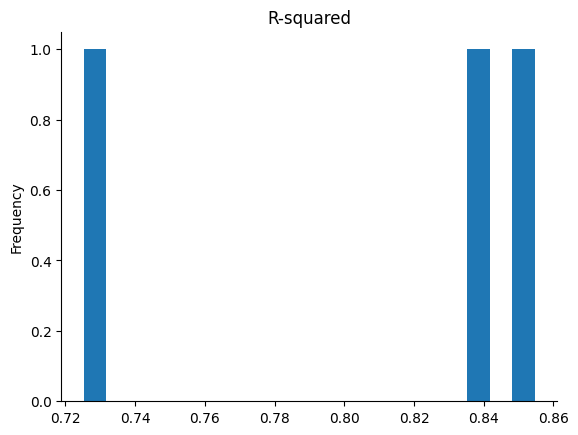

In [ ]:
from matplotlib import pyplot as plt
model_df['R-squared'].plot(kind='hist', bins=20, title='R-squared')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:


# Assuming 'data' DataFrame from the previous code cell is available.

# Identify outliers using the IQR method for 'temp_max'
Q1 = data['temp_max'].quantile(0.25)
Q3 = data['temp_max'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['temp_max'] < lower_bound) | (data['temp_max'] > upper_bound)]

print("Outliers in 'temp_max':")
print(outliers)

# You can similarly identify outliers in other numerical columns like 'wind' and 'precipitation'
# Example for 'wind':
Q1_wind = data['wind'].quantile(0.25)
Q3_wind = data['wind'].quantile(0.75)
IQR_wind = Q3_wind - Q1_wind
lower_bound_wind = Q1_wind - 1.5 * IQR_wind
upper_bound_wind = Q3_wind + 1.5 * IQR_wind

outliers_wind = data[(data['wind'] < lower_bound_wind) | (data['wind'] > upper_bound_wind)]

print("\nOutliers in 'wind':")
print(outliers_wind)
# Example for 'precipitation':
Q1_wind = data['precipitation'].quantile(0.25)
Q3_wind = data['precipitation'].quantile(0.75)
IQR_wind = Q3_wind - Q1_wind
lower_bound_prep = Q1_wind - 1.5 * IQR_wind
upper_bound_prep = Q3_wind + 1.5 * IQR_wind

outliers_prep = data[(data['precipitation'] < lower_bound_prep) | (data['precipitation'] > upper_bound_prep)]

print("\nOutliers in 'precipitation':")
print(outliers_prep)




Outliers in 'temp_max':
Empty DataFrame
Columns: [date, precipitation, temp_max, temp_min, wind, weather]
Index: []

Outliers in 'wind':
Empty DataFrame
Columns: [date, precipitation, temp_max, temp_min, wind, weather]
Index: []

Outliers in 'precipitation':
Empty DataFrame
Columns: [date, precipitation, temp_max, temp_min, wind, weather]
Index: []


In [ ]:



# Remove outliers using the IQR method for 'temp_max'
Q1 = data['temp_max'].quantile(0.25)
Q3 = data['temp_max'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_no_outliers = data[(data['temp_max'] >= lower_bound) & (data['temp_max'] <= upper_bound)]

print("Data without outliers in 'temp_max':")
print(data_no_outliers)


# Function to remove outliers from a specified column
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_no_outliers

# Remove outliers for multiple columns
columns_to_clean = ['temp_max', 'wind', 'precipitation']
for col in columns_to_clean:
    data = remove_outliers(data, col)

print("\nData after removing outliers from multiple columns:")
data


Data without outliers in 'temp_max':
            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
6     2012-01-07            0.0       7.2       2.8   2.3     rain
7     2012-01-08            0.0      10.0       2.8   2.0      sun
10    2012-01-11            0.0       6.1      -1.1   5.1      sun
11    2012-01-12            0.0       6.1      -1.7   1.9      sun
...          ...            ...       ...       ...   ...      ...
1448  2015-12-19            0.0       8.3       2.8   4.1      fog
1455  2015-12-26            0.0       4.4       0.0   2.5      sun
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[804 rows x 6 columns]

Data after removing outliers from multiple columns:


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
10,2012-01-11,0.0,6.1,-1.1,5.1,sun
11,2012-01-12,0.0,6.1,-1.7,1.9,sun
...,...,...,...,...,...,...
1448,2015-12-19,0.0,8.3,2.8,4.1,fog
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Linear Regression RMSE: 3.0647083058989706
Linear Regression R-squared: 0.817050679636939
Decision Tree RMSE: 4.364842442908423
Decision Tree R-squared: 0.6289011119266192
Random Forest RMSE: 3.425100161245458
Random Forest R-squared: 0.771493234895182
               Model      RMSE  R-squared
0  Linear Regression  3.064708   0.817051
1      Decision Tree  4.364842   0.628901
2      Random Forest  3.425100   0.771493


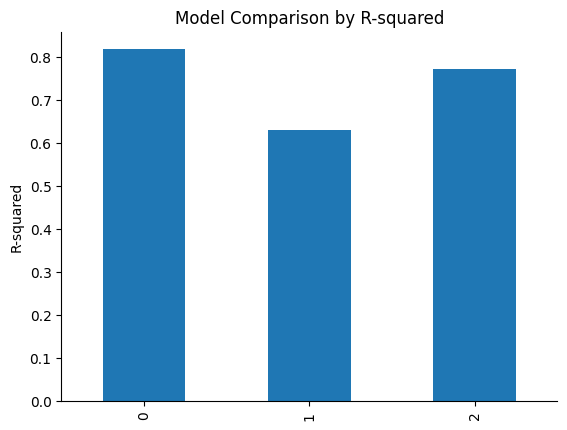

In [ ]:


# Assuming 'data' DataFrame and the necessary columns are available from the previous code cell.

# Prepare the data (same as before)
X = data.drop(['temp_max', 'date'], axis=1)
y = data['temp_max']
X = pd.get_dummies(X, columns=['weather'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} R-squared: {r2}")
    return rmse, r2


# Model training and evaluation
models = [
    (LinearRegression(), "Linear Regression"),
    (DecisionTreeRegressor(random_state=42), "Decision Tree"),
    (RandomForestRegressor(random_state=42), "Random Forest")
]

results = []

for model, name in models:
    rmse, r2 = train_and_evaluate(model, name)
    results.append({'Model': name, 'RMSE': rmse, 'R-squared':r2})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
print(results_df)

# Create the plot
results_df['R-squared'].plot(kind='bar', title='Model Comparison by R-squared')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('R-squared')
plt.show()


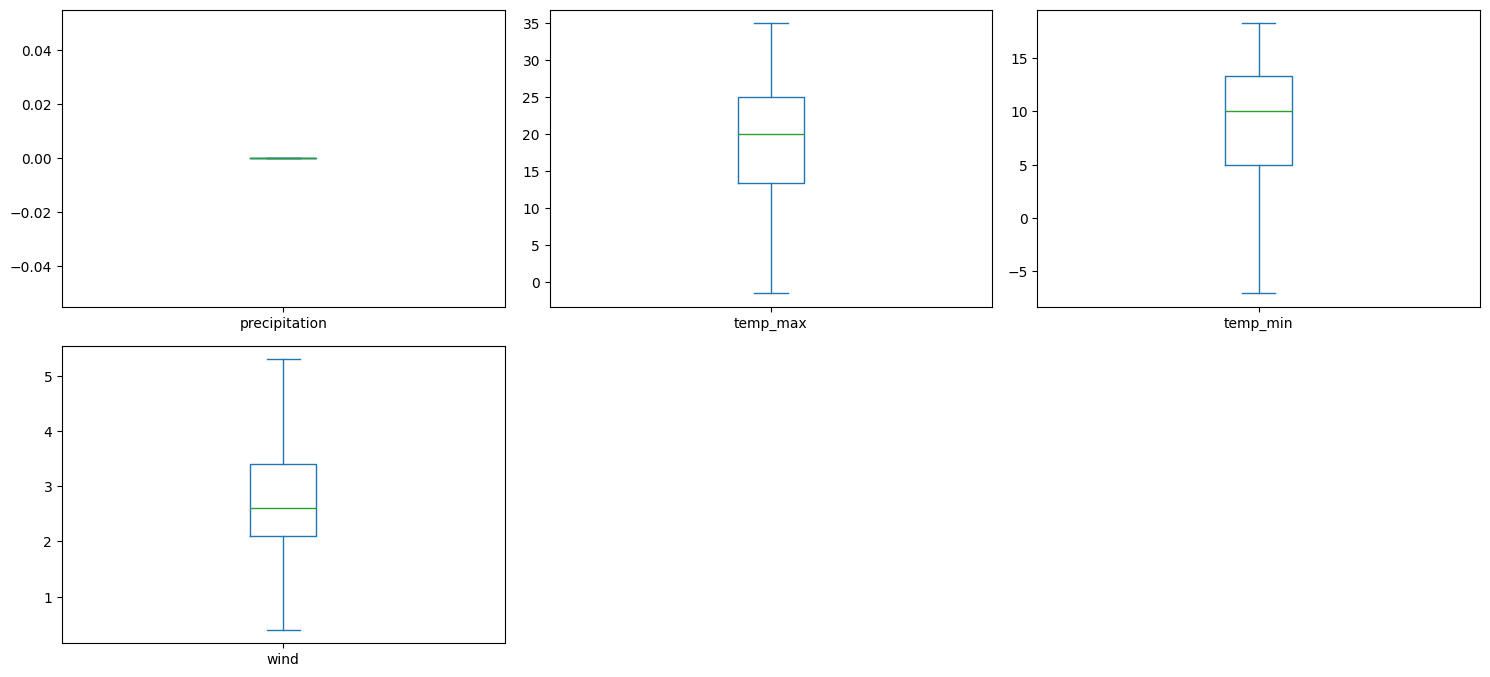

In [ ]:
# prompt: now plot box plot for all columns

import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is available from the previous code cell.

# Box plot for all numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10)) # Adjust layout as needed
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


Linear Regression RMSE: 3.0647083058989706
Linear Regression R-squared: 0.817050679636939
Decision Tree RMSE: 4.364842442908423
Decision Tree R-squared: 0.6289011119266192
Random Forest RMSE: 3.425100161245458
Random Forest R-squared: 0.771493234895182
               Model      RMSE  R-squared
0  Linear Regression  3.064708   0.817051
1      Decision Tree  4.364842   0.628901
2      Random Forest  3.425100   0.771493


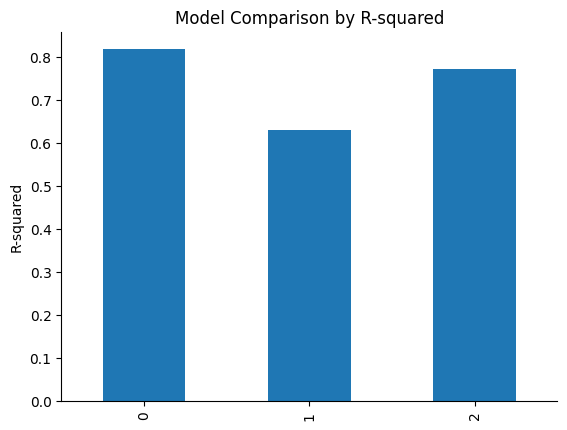

In [ ]:


# Assuming 'data' DataFrame and the necessary columns are available from the previous code cell.

# Prepare the data (same as before)
X = data.drop(['temp_max', 'date'], axis=1)
y = data['temp_max']
X = pd.get_dummies(X, columns=['weather'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} R-squared: {r2}")
    return rmse, r2


# Model training and evaluation
models = [
    (LinearRegression(), "Linear Regression"),
    (DecisionTreeRegressor(random_state=42), "Decision Tree"),
    (RandomForestRegressor(random_state=42), "Random Forest")
]

results = []

for model, name in models:
    rmse, r2 = train_and_evaluate(model, name)
    results.append({'Model': name, 'RMSE': rmse, 'R-squared':r2})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
print(results_df)

# Create the plot
results_df['R-squared'].plot(kind='bar', title='Model Comparison by R-squared')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('R-squared')
plt.show()


In [ ]:


import pandas as pd



def calculate_stats(data, column_name):
    """Calculates mean, median, mode, standard deviation, skewness, and kurtosis for a given column."""

    # Handle potential errors gracefully.
    try:
        mean = data[column_name].mean()
        median = data[column_name].median()
        mode = data[column_name].mode()[0]  # Get the first mode value
        sd = data[column_name].std()
        skewness = data[column_name].skew()
        kurtosis = data[column_name].kurt()
    except (KeyError, TypeError, IndexError) as e:
        print(f"Error calculating stats for column '{column_name}': {e}")
        return None  # Or return default values

    return pd.DataFrame({
        'Statistic': ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Skewness', 'Kurtosis'],
        'Value': [mean, median, mode, sd, skewness, kurtosis]
    }).set_index('Statistic')


# Example usage for 'temp_max'
temp_max_stats = calculate_stats(data, 'temp_max')
print("\nStatistics for 'temp_max':\n", temp_max_stats)

# Example usage for 'wind'
wind_stats = calculate_stats(data, 'wind')
print("\nStatistics for 'wind':\n", wind_stats)

# Example usage for 'precipitation'
precipitation_stats = calculate_stats(data, 'precipitation')
print("\nStatistics for 'precipitation':\n", precipitation_stats)



Statistics for 'temp_max':
                         Value
Statistic                    
Mean                19.209950
Median              20.000000
Mode                21.100000
Standard Deviation   7.721046
Skewness            -0.287158
Kurtosis            -0.688734

Statistics for 'wind':
                        Value
Statistic                   
Mean                2.733333
Median              2.600000
Mode                2.600000
Standard Deviation  0.971632
Skewness            0.330341
Kurtosis           -0.207524

Statistics for 'precipitation':
                     Value
Statistic                
Mean                  0.0
Median                0.0
Mode                  0.0
Standard Deviation    0.0
Skewness              0.0
Kurtosis              0.0


In [1]:


import scipy.stats as stats

# Example data (replace with your actual data)
data1 = [10, 12, 15, 13, 11, 14]
data2 = [8, 9, 10, 11, 12, 13]

# Perform the z-test
z_statistic, p_value = stats.ttest_ind(data1, data2)  # Use ttest_ind for independent samples

print(f"Z-test (or t-test):")
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")


# Perform one-sample t-test
data = [10, 12, 15, 13, 11, 14]
population_mean = 12  # Hypothesized population mean

t_statistic, p_value = stats.ttest_1samp(data, population_mean)

print(f"\nOne-sample t-test:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")


# Example paired t-test
before = [10, 12, 15, 13, 11, 14]
after = [8, 9, 10, 11, 12, 13]

t_statistic, p_value = stats.ttest_rel(before, after) # use ttest_rel for paired samples

print(f"\nPaired t-test:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the before and after measurements.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the before and after measurements.")


Z-test (or t-test):
Z-statistic: 1.851640199545103
P-value: 0.09379255157922317
Fail to reject the null hypothesis: There is no significant difference between the two groups.

One-sample t-test:
T-statistic: 0.6546536707079772
P-value: 0.5416045607931204
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.

Paired t-test:
T-statistic: 2.449489742783178
P-value: 0.057972773557539915
Fail to reject the null hypothesis: There is no significant difference between the before and after measurements.
